In [1]:
import json
import pandas as pd
import numpy as np
import lib.utils as utils
import lib.config as config
from lib.model import *
#import lib.split_pages as spages

/mnt/shared/scratch/ikarunak/apps/conda/envs/lightfootcat/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = load_model()
processor = load_processor()

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46
Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████| 5/5 [00:57<00:00, 11.49s/it]


In [3]:
image_path = "./sample-images/pg132_b.jpeg"

In [4]:
qwen_config = 

AttributeError: module 'lib.config' has no attribute 'DEFAULT_PROMPT'

In [11]:
config.PROMPT = "Transcribe the text in this page into a hierarchical JSON dictionary with headings above subheadings which are above folders and contents"
config.CONVERSATION = config.reset_conversation(config.PROMPT)

In [12]:
config.CONVERSATION

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Transcribe the text in this page into a hierarchical JSON dictionary with headings above subheadings which are above folders and contents'}]}]

In [13]:
output_text = perform_inference(model, processor, images=[image_path])

NameError: name 'model' is not defined

In [ ]:
output_text

In [4]:
from PIL import Image
from tesserocr import PyTessBaseAPI, PSM, RIL, PT
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [78]:
def box_area(box):
    return box['w'] * box['h']

def identifyROI(path: str, remove_area_perc: float = 0.005):
    
    with PyTessBaseAPI(psm=PSM.SINGLE_COLUMN) as api:
        image = Image.open(path)
        image_area = image.size[0] * image.size[1]
        
        api.SetImage(image)
        api.Recognize()
    
        x = None
        y = None
        w = None
        h = None
        boxes = api.GetComponentImages(RIL.BLOCK, True)
        for i, (im, box, _, _) in enumerate(boxes):

            #Define a better way to remove outliers (boxes with areas that are too small)
            if box_area(box) < (remove_area_perc * image_area):
                continue
            # im is a PIL image object
            # box is a dict with x, y, w and h keys
            x = box['x'] if x is None else min(x, box['x'])
            y = box['y'] if y is None else min(y, box['y'])
            w = box['x'] + box['w'] if w is None else max(w, box['x'] + box['w'])
            h = box['y'] + box['h'] if h is None else max(h, box['y'] + box['h'])
    
        return [x,y,w,h]

In [80]:
image_path = "./sample-images/double_page_sample.jpg"

(8666, 6278)
54405148
=====
{'x': 1384, 'y': 802, 'w': 4719, 'h': 142} with area 670098
1 :: None , None
1 || 6103 , 944
=====
=====
{'x': 1380, 'y': 875, 'w': 5874, 'h': 4420} with area 25963080
2 :: 6103 , 944
2 || 7254 , 5295
=====
=====
{'x': 1482, 'y': 5260, 'w': 5733, 'h': 117} with area 670761
3 :: 7254 , 5295
3 || 7254 , 5377
=====
FINAL WH: 7254, 5377


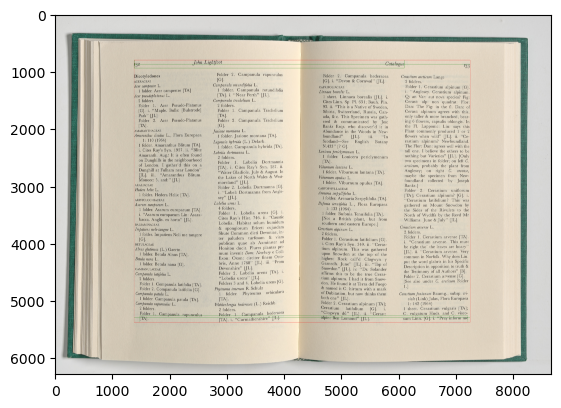

In [85]:
from PIL import Image, ImageDraw
from tesserocr import PyTessBaseAPI, PSM, RIL

#with PyTessBaseAPI() as api:
#    print(api.GetAvailableLanguages())



with PyTessBaseAPI(psm=PSM.SINGLE_COLUMN) as api:
    image = Image.open(image_path)

    print(image.size)
    max_area = image.size[0] * image.size[1]
    print(image.size[0] * image.size[1])
    api.SetImage(image)
    api.Recognize()

    draw = ImageDraw.Draw(image)
    
    x = None
    y = None
    w = None
    h = None
    boxes = api.GetComponentImages(RIL.BLOCK, True)
    for i, (im, box, _, _) in enumerate(boxes):
        if box_area(box) < 0.005 * max_area:
            continue
        # im is a PIL image object
        # box is a dict with x, y, w and h keys
        x = box['x'] if x is None else min(x, box['x'])
        y = box['y'] if y is None else min(y, box['y'])
        print("="*5)
        print(f"{box} with area {box_area(box)}")
        print(f"{i} :: {w} , {h}")
        w = box['x'] + box['w'] if w is None else max(w, box['x'] + box['w'])
        h = box['y'] + box['h'] if h is None else max(h, box['y'] + box['h'])
        print(f"{i} || {w} , {h}")
        print("="*5)
        draw.rectangle([box['x'], box['y'], box['x'] + box['w'], box['y'] + box['h']], outline='green', width=3)

    print(f"FINAL WH: {w}, {h}")
    draw.rectangle([x, y, w, h], outline='red', width=3)

    #image.save('output_with_blocks.jpg')
    plt.imshow(image)

In [33]:
nimage = Image.open(image_path)
pad = 50

In [34]:
nimage = nimage.crop((x-pad,y-pad,w+pad,h+pad))

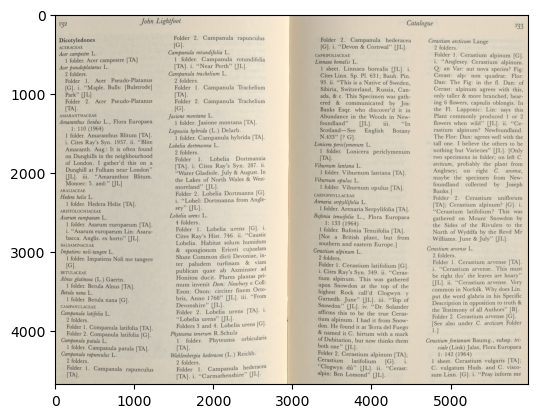

In [35]:
plt.imshow(nimage)

In [36]:
nimage.save("Cropped_image.jpg")

In [39]:
w,h = nimage.size

In [40]:
nimage = nimage.resize((int(w * 0.4), int(h*0.4)))

In [41]:
nimage.save("Cropped_image_resized.jpg")

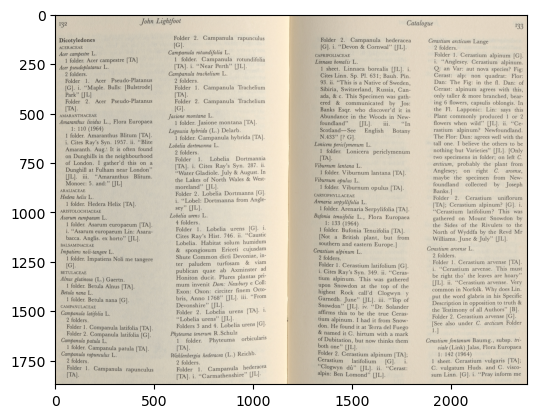

In [42]:
plt.imshow(nimage)